In [ ]:
'''
A quick look at using DBSCAN algorithm
'''

In [6]:
# importing the libraries
import numpy as np
import pandas as pd

In [7]:
# importing the dataset
dataset = pd.read_csv('Customers.csv')
X = dataset.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [8]:
# apply DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)

In [10]:
# fitting the model
model = dbscan.fit(X)
labels = model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [12]:
# identifying the point which makes up our core points
from sklearn import metrics
sample_cores = np.zeros_like(labels, dtype = bool)
sample_cores[dbscan.core_sample_indices_] = True

In [14]:
# calculating the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

9

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
metrics.silhouette_score(X, labels)

-0.1908319132560097

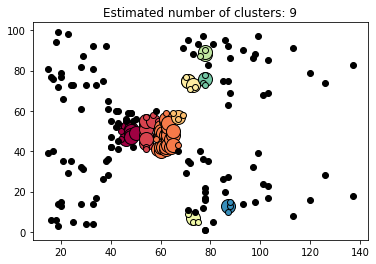

In [19]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~sample_cores]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()